In [1]:
import sys
sys.path.append("./python")
import mpt
import numpy as np
import time
from tic_toc_timer import tic, toc



In [2]:
from python import simple_ml
import struct
import numpy as np
import gzip
def parse_mnist(image_filename, label_filename):
    def readLabels(filePath=label_filename):
        with gzip.open(filePath, 'rb') as f:
            return [struct.unpack('>II', f.read(8)), np.frombuffer(f.read(), dtype=np.uint8)]

    def readImages(filePath=image_filename):
        with gzip.open(filePath, 'rb') as f:
            [magic, images, rows, cols] = struct.unpack('>IIII', f.read(16))
            return np.resize(np.frombuffer(f.read(), dtype=np.uint8), (images, rows*cols))/np.float32(255)
    return (readImages(), readLabels()[1])
X_tr, y_tr = parse_mnist("data/train-images-idx3-ubyte.gz",
                             "data/train-labels-idx1-ubyte.gz")
X_te, y_te = parse_mnist("data/t10k-images-idx3-ubyte.gz",
                            "data/t10k-labels-idx1-ubyte.gz")
simple_ml.train_softmax(X_tr, y_tr, X_te, y_te, epochs=10, lr=0.1)

| Epoch | Train Loss | Train Err | Test Loss | Test Err |
|     0 |    0.38625 |   0.10812 |   0.36690 |  0.09960 |
|     1 |    0.34486 |   0.09748 |   0.32926 |  0.09180 |
|     2 |    0.32663 |   0.09187 |   0.31376 |  0.08770 |
|     3 |    0.31572 |   0.08867 |   0.30504 |  0.08510 |
|     4 |    0.30822 |   0.08667 |   0.29940 |  0.08320 |
|     5 |    0.30264 |   0.08508 |   0.29543 |  0.08250 |
|     6 |    0.29825 |   0.08393 |   0.29247 |  0.08180 |
|     7 |    0.29466 |   0.08305 |   0.29017 |  0.08120 |
|     8 |    0.29166 |   0.08215 |   0.28832 |  0.08070 |
|     9 |    0.28908 |   0.08137 |   0.28680 |  0.08080 |


In [2]:
# Load Data
data_dir="./data/"
batch_size=100
train_dataset = mpt.data.MNISTDataset(
    data_dir+"/train-images-idx3-ubyte.gz",
    data_dir+"/train-labels-idx1-ubyte.gz"
)
test_dataset = mpt.data.MNISTDataset(
    data_dir+"/t10k-images-idx3-ubyte.gz",
    data_dir+"/t10k-labels-idx1-ubyte.gz"
)
train_dataloader = mpt.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_dataloader = mpt.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True
)


In [1]:
# Define network
import mpt.nn as nn

def simple_nn():
    return nn.Sequential(
        nn.Linear(784, 20),
        nn.Linear(20, 10)
    )
def loss_err(h, y):
    """ Helper function to compute both loss and error"""
    lossModule = nn.SoftmaxLoss()
    return (
        lossModule.forward(h, y),
        np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32)
    )

ModuleNotFoundError: No module named 'mpt'

In [12]:
#epoch
def epoch(dataloader: mpt.data.DataLoader,
          model: mpt.nn.Module,
          opt: mpt.optim.Optimizer = None):
    np.random.seed(4)

    if opt is None:
        model.eval()
    else :
        model.train()
    loss = 0
    err = 0
    i = 0
    num_sample = 0
    for _, data in enumerate(dataloader):
        imgs = data[0]
        labels = data[1]
        i += 1
        forwardRes = model.forward(imgs)
        iLoss, iError = loss_err(forwardRes, labels)
        loss += iLoss.numpy()[0]
        err += iError
        num_sample += labels.shape[0]
        if opt is not None:
            iLoss.backward()
            opt.step()

    print("{:.2f}% |   {:.5f}".format((err/num_sample)*100,loss/i))
    return (err/num_sample, loss/i)
    

In [ ]:
# Train
train_acc, train_loss = None, None
model = simple_nn()
opt = mpt.optim.SGD(model.parameters(), lr=0.1, weight_decay=0.001)
print("Err | Loss")
for _ in range(10):
    train_acc, train_loss = epoch(train_dataloader, model=model, opt=opt)
test_acc, test_loss = epoch(test_dataloader, model=model)
print()
print("{:.5f} |   {:.5f}".format(test_acc, test_loss))

In [61]:
testImg=mpt.Tensor(test_dataset[0][0]).reshape((-1,1)).transpose()
testLabel=mpt.Tensor(test_dataset[0][1])
def loss_err(h, y):
    lossModule = nn.SoftmaxLoss()
    return (
        lossModule.forward(h, y),
        np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32)
    )

In [75]:
h=model.forward(testImg)
y=testLabel
print(np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32))

0.0


In [80]:
h2=net.forward(testImg)
y2=testLabel
print(h2)
print(h2.numpy().argmax(axis=1) != y2.numpy())
print(np.sum(h2.numpy().argmax(axis=1) != y2.numpy(), dtype=np.float32))

[[ 0.38178068 -0.45340216  0.46996555  0.6675435  -0.31004506  0.46440935
  -0.59473586  0.2853446  -1.3865604  -0.27761897]]
[ True]
1.0


# 展示例子 1 Matrix tiled Multiply

In [2]:
import sys
sys.path.append("./python")
import pandas as pd
import numpy as np
import mpt
import time
def tic():
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    if 'startTime_for_tictoc' in globals():
        return time.time() - startTime_for_tictoc
    else:
        return None
sizes=[i for i in range(8,12*8,8)]

times = []
times2 = []

In [3]:
for sz in sizes:
    a=mpt.Tensor(np.random.randn(sz,sz),device=mpt.cpu())
    b=mpt.Tensor(np.random.randn(sz,sz),device=mpt.cpu())
    tic()
    for k in range(5):
        res=mpt.ops.matmul(a,b)
    costedTime=toc()
    times.append(costedTime)

    c=np.random.randn(sz,sz).astype('f')
    d=np.random.randn(sz,sz).astype('f')
    res2=np.ndarray((sz,sz))
    tic()
    for k in range(5):
        for i in range(sz):
            for j in range(sz):
                thissum=0
                for k in range(sz):
                    thissum+=c[i,j]*d[j,k]
                res2[i,k]=thissum
    times2.append(toc())

df = pd.DataFrame({'mpt.matmul': times, 'for loop': times2})
print(df.describe())

       mpt.matmul   for loop
count   11.000000  11.000000
mean     0.015177   0.727764
std      0.015208   0.757780
min      0.002035   0.007193
25%      0.003407   0.094271
50%      0.010322   0.616992
75%      0.024225   1.099668
max      0.048702   2.240249


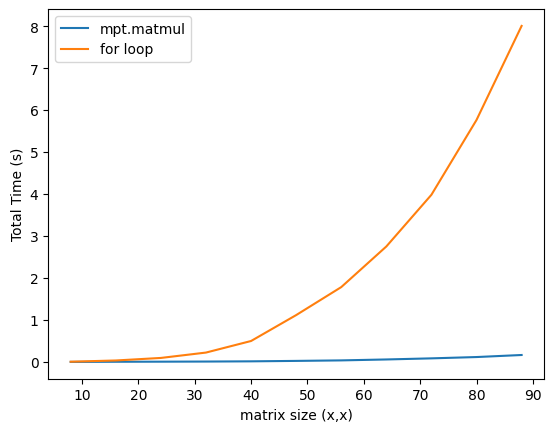

In [4]:
import matplotlib.pyplot as plt
# 计算时间记录到times和times2列表中

total_times = np.cumsum(times)
total_times2 = np.cumsum(times2)

plt.plot(sizes,total_times, label='mpt.matmul')
plt.plot(sizes,total_times2, label='for loop')
plt.xlabel('matrix size (x,x)')
plt.ylabel('Total Time (s)')
plt.legend()
plt.show()



# 展示例子2 自动求导

In [7]:
import sys
sys.path.append("./python")
import mpt
a=mpt.Tensor(4)
b=mpt.Tensor(3)
c=a+b
# c.backward()
d=c*4
e=d/2
e.backward()
a.grad

mpt.Tensor(2.0)

# 展示例子3 模块化的神经网络

In [2]:
import sys
sys.path.append("./python")
import mpt
import mpt.nn as nn
lossModule = nn.SoftmaxLoss()
def simple_nn():
    return nn.Sequential(
        nn.Linear(2, 2),
        nn.Linear(2, 1)
    )

model=simple_nn()
model.forward(mpt.Tensor([[1,2]]))

mpt.Tensor([[1.7892647]])

In [5]:
print(model.modules[1].parameters())

[mpt.Tensor([[1.4103342]
 [0.9667679]]), mpt.Tensor([[-2.1842027]])]


# 实验成果展示 残差网络

In [1]:
import os
import time
import sys
sys.path.append("./python")
import numpy as np
import mpt.nn as nn
import mpt
import sys
sys.path.append('../python')

np.random.seed(0)


def ResidualBlock(dim, hidden_dim, norm=nn.BatchNorm1d, drop_prob=0.1):
    return nn.Sequential(
        nn.Residual(
            nn.Sequential(
                nn.Linear(dim, hidden_dim),
                norm(hidden_dim),
                nn.ReLU(),
                nn.Dropout(drop_prob),
                nn.Linear(hidden_dim, dim),
                norm(dim))
        ),
        nn.ReLU()
    )

def MLPResNet(dim, hidden_dim=100, num_blocks=3, num_classes=10, norm=nn.BatchNorm1d, drop_prob=0.1):
    ls = [nn.Linear(dim, hidden_dim), nn.ReLU()]
    for _ in range(num_blocks):
        ls.append(
            ResidualBlock(hidden_dim, hidden_dim//2,
                          norm, drop_prob)
        )
    ls.append(nn.Linear(hidden_dim, num_classes)) # 分类层
    return nn.Sequential(*ls)


def epoch(dataloader: mpt.data.DataLoader,
          model: mpt.nn.Module,
          opt: mpt.optim.Optimizer = None):
    np.random.seed(4)

    def loss_err(h, y):
        """ Helper function to compute both loss and error"""
        lossModule = nn.SoftmaxLoss()
        return (
            lossModule.forward(h, y),
            np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32)
        )

    if opt is None:
        model.eval()
        loss = 0
        err = 0
        i = 0
        num_sample = 0
        for _, data in enumerate(dataloader):
            imgs = data[0]
            labels = data[1]
            i += 1
            forwardRes = model.forward(imgs)
            iLoss, iError = loss_err(forwardRes, labels)
            loss += iLoss.numpy()[0]
            err += iError
            num_sample += labels.shape[0]
        return (err/num_sample, loss/i)
    else:
        model.train()
        loss = 0
        err = 0
        i = 0
        num_sample = 0
        for _, data in enumerate(dataloader):
            imgs = data[0]
            labels = data[1]
            i += 1
            forwardRes = model.forward(imgs)
            iLoss, iError = loss_err(forwardRes, labels)
            loss += iLoss.numpy()[0]
            err += iError
            num_sample += labels.shape[0]
            iLoss.backward()
            opt.step()
        return (err/num_sample, loss/i)



def train_mnist(batch_size=100, epochs=10, optimizer=mpt.optim.Adam,
                lr=0.001, weight_decay=0.001, hidden_dim=100, data_dir="data"):
    np.random.seed(4)
    train_dataset = mpt.data.MNISTDataset(
        data_dir+"/train-images-idx3-ubyte.gz",
        data_dir+"/train-labels-idx1-ubyte.gz"
    )
    test_dataset = mpt.data.MNISTDataset(
        data_dir+"/t10k-images-idx3-ubyte.gz",
        data_dir+"/t10k-labels-idx1-ubyte.gz"
    )
    train_dataloader = mpt.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    test_dataloader = mpt.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    
    train_acc, train_loss = None, None
    model = MLPResNet(784, hidden_dim=hidden_dim)
    opt = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    for _ in range(epochs):
        train_acc, train_loss = epoch(train_dataloader, model=model, opt=opt)
        print(train_acc,train_loss)
    test_acc, test_loss = epoch(test_dataloader, model=model)

    return (train_acc, train_loss, test_acc, test_loss)


In [2]:
train_mnist(data_dir="./data")


0.12108333333333333 0.3974546681592862
0.047483333333333336 0.15649551898241043
0.03261666666666667 0.10916779043463369
0.02555 0.0849009525232638
0.020533333333333334 0.07020557472327103
0.018783333333333332 0.06289037507415439
0.018133333333333335 0.05864228433153282
0.015416666666666667 0.052265735208056864
0.015083333333333334 0.05042913194202508
0.014533333333333334 0.04776712784077972


(0.014533333333333334, 0.04776712784077972, 0.0287, 0.10170565110631287)

# 组会展示 4.17

### 两层的线性网络

In [2]:
import sys
sys.path.append("./python")
import mpt
import numpy as np
import time
from tic_toc_timer import tic, toc



In [3]:
# Load Data
data_dir="./data/"
batch_size=100
train_dataset = mpt.data.MNISTDataset(
    data_dir+"/train-images-idx3-ubyte.gz",
    data_dir+"/train-labels-idx1-ubyte.gz"
)
test_dataset = mpt.data.MNISTDataset(
    data_dir+"/t10k-images-idx3-ubyte.gz",
    data_dir+"/t10k-labels-idx1-ubyte.gz"
)
train_dataloader = mpt.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_dataloader = mpt.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True
)


In [4]:
# Define network
import mpt.nn as nn

def simple_nn():
    return nn.Sequential(
        nn.Linear(784, 20),
        nn.Linear(20, 10)
    )
def loss_err(h, y):
    """ Helper function to compute both loss and error"""
    lossModule = nn.SoftmaxLoss()
    return (
        lossModule.forward(h, y),
        np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32)
    )

In [5]:
#epoch
def epoch(dataloader: mpt.data.DataLoader,
          model: mpt.nn.Module,
          opt: mpt.optim.Optimizer = None):
    np.random.seed(4)

    if opt is None:
        model.eval()
    else :
        model.train()
    loss = 0
    err = 0
    i = 0
    num_sample = 0
    for _, data in enumerate(dataloader):
        imgs = data[0]
        labels = data[1]
        i += 1
        forwardRes = model.forward(imgs)
        iLoss, iError = loss_err(forwardRes, labels)
        loss += iLoss.numpy()[0]
        err += iError
        num_sample += labels.shape[0]
        if opt is not None:
            iLoss.backward()
            opt.step()

    print("{:.2f}% |   {:.5f}".format((err/num_sample)*100,loss/i))
    return (err/num_sample, loss/i)
    

In [6]:
# Train
train_acc, train_loss = None, None
model = simple_nn()
opt = mpt.optim.SGD(model.parameters(), lr=0.1, weight_decay=0.001)
print("Err | Loss")
for _ in range(10):
    train_acc, train_loss = epoch(train_dataloader, model=model, opt=opt)
test_acc, test_loss = epoch(test_dataloader, model=model)
print()
print("{:.5f} |   {:.5f}".format(test_acc, test_loss))

Err | Loss
12.53% |   0.44440
8.92% |   0.31584
8.45% |   0.29993
8.19% |   0.29176
8.00% |   0.28656
7.94% |   0.28289
7.87% |   0.28015
7.79% |   0.27802
7.73% |   0.27631
7.66% |   0.27491
7.90% |   0.27684

0.07900 |   0.27684


In [ ]:
testImg=mpt.Tensor(test_dataset[0][0]).reshape((-1,1)).transpose()
testLabel=mpt.Tensor(test_dataset[0][1])
def loss_err(h, y):
    lossModule = nn.SoftmaxLoss()
    return (
        lossModule.forward(h, y),
        np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32)
    )

In [ ]:
h=model.forward(testImg)
y=testLabel
print(np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32))

0.0


In [ ]:
h2=net.forward(testImg)
y2=testLabel
print(h2)
print(h2.numpy().argmax(axis=1) != y2.numpy())
print(np.sum(h2.numpy().argmax(axis=1) != y2.numpy(), dtype=np.float32))

[[ 0.38178068 -0.45340216  0.46996555  0.6675435  -0.31004506  0.46440935
  -0.59473586  0.2853446  -1.3865604  -0.27761897]]
[ True]
1.0


## 函数定义

In [20]:
# Load Data
from tic_toc_timer import tic, toc
import time
import numpy as np
import mpt.nn as nn
import mpt
import sys
sys.path.append("./python")


def loadData():
    data_dir = "./data/"
    batch_size = 100
    train_dataset = mpt.data.MNISTDataset(
        data_dir+"/train-images-idx3-ubyte.gz",
        data_dir+"/train-labels-idx1-ubyte.gz"
    )
    test_dataset = mpt.data.MNISTDataset(
        data_dir+"/t10k-images-idx3-ubyte.gz",
        data_dir+"/t10k-labels-idx1-ubyte.gz"
    )
    train_dataloader = mpt.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    test_dataloader = mpt.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    return train_dataset, train_dataloader, test_dataset, test_dataloader


def loss_err(h, y):
    lossModule = nn.SoftmaxLoss()
    return (
        lossModule.forward(h, y),
        np.sum(h.numpy().argmax(axis=1) != y.numpy(), dtype=np.float32)
    )

# epoch


def epoch(dataloader: mpt.data.DataLoader,
          model: mpt.nn.Module,
          opt: mpt.optim.Optimizer = None):
    np.random.seed(4)

    if opt is None:
        model.eval()
    else:
        model.train()
    loss = 0
    err = 0
    i = 0
    num_sample = 0
    for _, data in enumerate(dataloader):
        imgs = data[0]
        labels = data[1]
        i += 1
        forwardRes = model.forward(imgs)
        iLoss, iError = loss_err(forwardRes, labels)
        loss += iLoss.numpy()[0]
        err += iError
        num_sample += labels.shape[0]
        if opt is not None:
            iLoss.backward()
            opt.step()

    print("{:.2f}% |   {:.5f}".format((err/num_sample)*100, loss/i))
    return (err/num_sample, loss/i)


# model
# Simple NN
def simple_nn():
    return nn.Sequential(
        nn.Linear(784, 20),
        nn.Linear(20, 10)
    ),"simple_nn"

# ResNet


def ResidualBlock(dim, hidden_dim, norm=nn.BatchNorm1d, drop_prob=0.1):
    return nn.Sequential(
        nn.Residual(
            nn.Sequential(
                nn.Linear(dim, hidden_dim),
                norm(hidden_dim),
                nn.ReLU(),
                nn.Dropout(drop_prob),
                nn.Linear(hidden_dim, dim),
                norm(dim))
        ),
        nn.ReLU()
    )


def MLPResNet(dim, hidden_dim=100, num_blocks=3, num_classes=10, norm=nn.BatchNorm1d, drop_prob=0.1):
    ls = [nn.Linear(dim, hidden_dim), nn.ReLU()]
    for _ in range(num_blocks):
        ls.append(
            ResidualBlock(hidden_dim, hidden_dim//2,
                          norm, drop_prob)
        )
    ls.append(nn.Linear(hidden_dim, num_classes))  # 分类层
    return nn.Sequential(*ls),"MLPResNet"


## 训练对比

In [28]:
train_acc, train_loss = None, None

modelSimpleNN = simple_nn()
modelResNet = MLPResNet(784, hidden_dim=100)
optSGD = mpt.optim.SGD
optAdam = mpt.optim.Adam


# train 2*2, and visualize
modelList = [modelSimpleNN, modelResNet]
optList = [optSGD, optAdam]

train_accList = []
train_lossList = []

test_accList = []
test_lossList = []
timeList = []
for (model, opt) in [(model, opt) for model in modelList for opt in optList]:
    [train_dataset, train_dataloader, test_dataset, test_dataloader] = loadData()
    thisOpt = opt(model[0].parameters(), lr=0.1, weight_decay=0.001)
    print(model[1], opt)
    print("Err | Loss")
    tic()
    for _ in range(10):
        train_acc, train_loss = epoch(
            train_dataloader, model=model[0], opt=thisOpt)
    print("TEST")
    test_acc, test_loss = epoch(test_dataloader, model=model[0])
    t = toc()

    timeList.append(t)
    train_lossList.append(train_loss)
    test_lossList.append(test_loss)
    train_accList.append(train_acc)
    test_accList.append(test_acc)
    print("time: ", t)


simple_nn <class 'mpt.optim.SGD'>
Err | Loss
12.98% |   0.45212
9.01% |   0.31810
8.47% |   0.30048
8.21% |   0.29172
8.07% |   0.28632
7.96% |   0.28259
7.88% |   0.27984
7.81% |   0.27772
7.72% |   0.27603
7.67% |   0.27465
7.85% |   0.27633
0.07850 |   0.27633 TEST
time:  0:01:12.062722  seconds
simple_nn <class 'mpt.optim.Adam'>
Err | Loss
16.08% |   0.94952
19.38% |   0.90033
18.37% |   0.97569
18.77% |   0.83938
20.31% |   1.36762
16.59% |   0.76471
19.85% |   1.21961
17.31% |   1.24014
17.76% |   0.78394
18.03% |   1.14910
16.88% |   0.63192
0.16880 |   0.63192 TEST
time:  0:01:59.496490  seconds
MLPResNet <class 'mpt.optim.SGD'>
Err | Loss
10.24% |   0.33304
4.81% |   0.15718
3.42% |   0.11381
2.58% |   0.08759
1.99% |   0.06944
1.56% |   0.05647
1.27% |   0.04624
1.03% |   0.03872
0.87% |   0.03335
0.75% |   0.03009
2.60% |   0.09090
0.02600 |   0.09090 TEST
time:  0:11:15.112961  seconds
MLPResNet <class 'mpt.optim.Adam'>
Err | Loss
19.14% |   0.80925
21.85% |   0.80273
19.65

In [32]:
print("train_accList:\t",train_accList)
print("train_lossList:\t",train_lossList)
print("test_accList:\t",test_accList)
print("test_lossList:\t",test_lossList)
print("timeList:\t",timeList)

train_accList:	 [0.07673333333333333, 0.1803, 0.007533333333333334, 0.2472]
train_lossList:	 [0.2746484576165676, 1.1491027573744457, 0.030090059110273917, 0.7930528383950393]
test_accList:	 [0.0785, 0.1688, 0.026, 0.2113]
test_lossList:	 [0.2763303181529045, 0.6319184058904648, 0.09090447120834141, 0.6953959873318672]
timeList:	 [datetime.timedelta(seconds=72, microseconds=62722), datetime.timedelta(seconds=119, microseconds=496490), datetime.timedelta(seconds=675, microseconds=112961), datetime.timedelta(seconds=693, microseconds=241430)]


In [12]:
# use different learning rate
train_acc, train_loss = None, None

modelSimpleNN = simple_nn()
modelResNet = MLPResNet(784, hidden_dim=100)
optSGD = mpt.optim.SGD
optAdam = mpt.optim.Adam


# train 2*2, and visualize
modelList = [modelSimpleNN, modelResNet]
optList = [optSGD, optAdam]

train_accList = []
train_lossList = []

test_accList = []
test_lossList = []
timeList = []
for (model, opt) in [(model, opt) for model in modelList for opt in optList]:
    [train_dataset, train_dataloader, test_dataset, test_dataloader] = loadData()
    thisOpt = opt(model[0].parameters(), lr=0.001, weight_decay=0.001)
    print(model[1], opt)
    print("Err | Loss")
    tic()
    for _ in range(10):
        train_acc, train_loss = epoch(
            train_dataloader, model=model[0], opt=thisOpt)
    print("TEST")
    test_acc, test_loss = epoch(test_dataloader, model=model[0])
    t = toc()

    timeList.append(t)
    train_lossList.append(train_loss)
    test_lossList.append(test_loss)
    train_accList.append(train_acc)
    test_accList.append(test_acc)
    print("time: ", t, " seconds")


NameError: name 'simple_nn' is not defined

In [34]:
print("train_accList = ",train_accList)
print("train_lossList = ",train_lossList)
print("test_accList = ",test_accList)
print("test_lossList = ",test_lossList)
print("timeList = ",timeList)

train_accList =  [0.15671666666666667, 0.0758, 0.11516666666666667, 0.014366666666666666]
train_lossList =  [0.5967742698391278, 0.27257578710714975, 0.3863513117780288, 0.045549460020071514]
test_accList =  [0.1456, 0.0763, 0.0895, 0.0297]
test_lossList =  [0.5570591828227043, 0.27045953899621966, 0.2983111513406038, 0.09459613444283604]
timeList =  [datetime.timedelta(seconds=64, microseconds=939863), datetime.timedelta(seconds=118, microseconds=871126), datetime.timedelta(seconds=711, microseconds=642097), datetime.timedelta(seconds=840, microseconds=721068)]


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn as nn

# 定义残差块


class ResidualBlock(nn.Module):
    def __init__(self, dim, hidden_dim, norm=nn.BatchNorm1d, drop_prob=0.1):
        super(ResidualBlock, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            norm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(drop_prob),
            nn.Linear(hidden_dim, dim),
            norm(dim),
            nn.ReLU()
        )

    def forward(self, x):
        return self.net(x) + x

# 定义MLPResNet模型


class MLPResNet(nn.Module):
    def __init__(self, dim, hidden_dim=100, num_blocks=3, num_classes=10, norm=nn.BatchNorm1d, drop_prob=0.1):
        super(MLPResNet, self).__init__()
        # 定义模型结构
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.ReLU()
        )
        for _ in range(num_blocks):
            self.net.add_module(
                'residual_block{}'.format(_),
                ResidualBlock(hidden_dim, hidden_dim // 2, norm, drop_prob)
            )
        self.net.add_module(
            'fc',
            nn.Linear(hidden_dim, num_classes)
        )
        self.net.add_module(
            'log_softmax',
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.net(x)
        return x


# 定义超参数
batch_size = 64
learning_rate = 0.1
num_epochs = 10

# 加载MNIST数据集
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

# 初始化模型并定义优化器和损失函数
model = MLPResNet(dim=784)
device = torch.device("cpu")
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

lossListPytorch = []

# 训练模型
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        # 将数据加载到CPU
        data, target = data.to(device), target.to(device)

        # 前向传播
        output = model(data.view(-1, 784))

        # 计算损失
        loss = criterion(output, target)

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    lossListPytorch.append(loss.item)

# 在测试集上计算模型准确率
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        # 将数据加载到CPU
        data, target = data.to(device), target.to(device)

        # 前向传播
        output = model(data.view(-1, 784))

        # 计算损失
        test_loss += criterion(output, target).item()

        # 统计预测正确的样本数量
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

# 打印测试集上的结果
test_loss /= len(test_loader.dataset)
print('Epoch: {} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
    epoch, test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

print("lossListPytorch", lossListPytorch)


Epoch: 9 Test set: Average loss: 0.0014, Accuracy: 9754/10000 (98%)
lossListPytorch [<built-in method item of Tensor object at 0x7f5f294b9170>, <built-in method item of Tensor object at 0x7f5f294253a0>, <built-in method item of Tensor object at 0x7f5f276bff60>, <built-in method item of Tensor object at 0x7f5f276bf0b0>, <built-in method item of Tensor object at 0x7f5f276bff10>, <built-in method item of Tensor object at 0x7f5f27636cf0>, <built-in method item of Tensor object at 0x7f5f276bf740>, <built-in method item of Tensor object at 0x7f5f812e6b60>, <built-in method item of Tensor object at 0x7f5f276be340>, <built-in method item of Tensor object at 0x7f5f276be7a0>]


In [11]:
print("lossListPytorch=[")
for loss in lossListPytorch:
    print(loss(),", ",end="")
print("]")

lossListPytorch=[
0.16931498050689697 , 0.2504355311393738 , 0.161612406373024 , 0.06755511462688446 , 0.24254870414733887 , 0.07409413158893585 , 0.02175862342119217 , 0.0926036387681961 , 0.0052053420804440975 , 0.06018472835421562 , ]
